## Projeto 2 - Ciência dos Dados 
  Mateus Ruggero, João Antônio Gomes, Pedro La

## Introdução

O projeto tem como objetivo responder qual a taxa de admição para a pós graduação em uma universidade americana em função das pontuações em uma série de testes e estatísticas acadêmicas por meio de métodos preditivos de regressão.
Para isso, foi utilizado um dataset chamado Admission Predict, adotando como variável target a Chance of Admission, e as demais variáveis, com excessão da series number, como features.
A seguir está uma breve descrição do significado de cada variável:

Chance of Admission: chance de 0 a 1 que um indivíduo tem de ser aceito para a pós graduação em uma universidade.
- **TOEFL**: Nota no exame de proficiência na língua inglesa
- **GRE**: Nota no Exame de Registro de Graduação
- **CGPA**: Valor do desempenho acadêmico ao longo de um determinado período de estudos, em geral, Ensino Médio ou Graduação
- **Rank da Universidade**: Prestígio da universidade ranqueado de 1 a 5
- **Statement of Purpose (SOP)**: Declaração pessoal de propósito que cita a razão de um candidato querer ingressar em uma universidade
- **Letter of Recommendation**: Carta de recomendação 
- **Research**: Indivíduo já fez alguma pesquisa de cunho acadêmico


In [86]:
#Importações

%matplotlib notebook

import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Regression Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

#Importações para as predições
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Melhora a visualização
from IPython.display import display

In [87]:
#Função para Regressão
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [88]:
data = pd.read_csv("Admission_Predict.csv")

## Análise Exploratória

In [89]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [90]:
#Criação do DataFrame
df = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


<IPython.core.display.Javascript object>


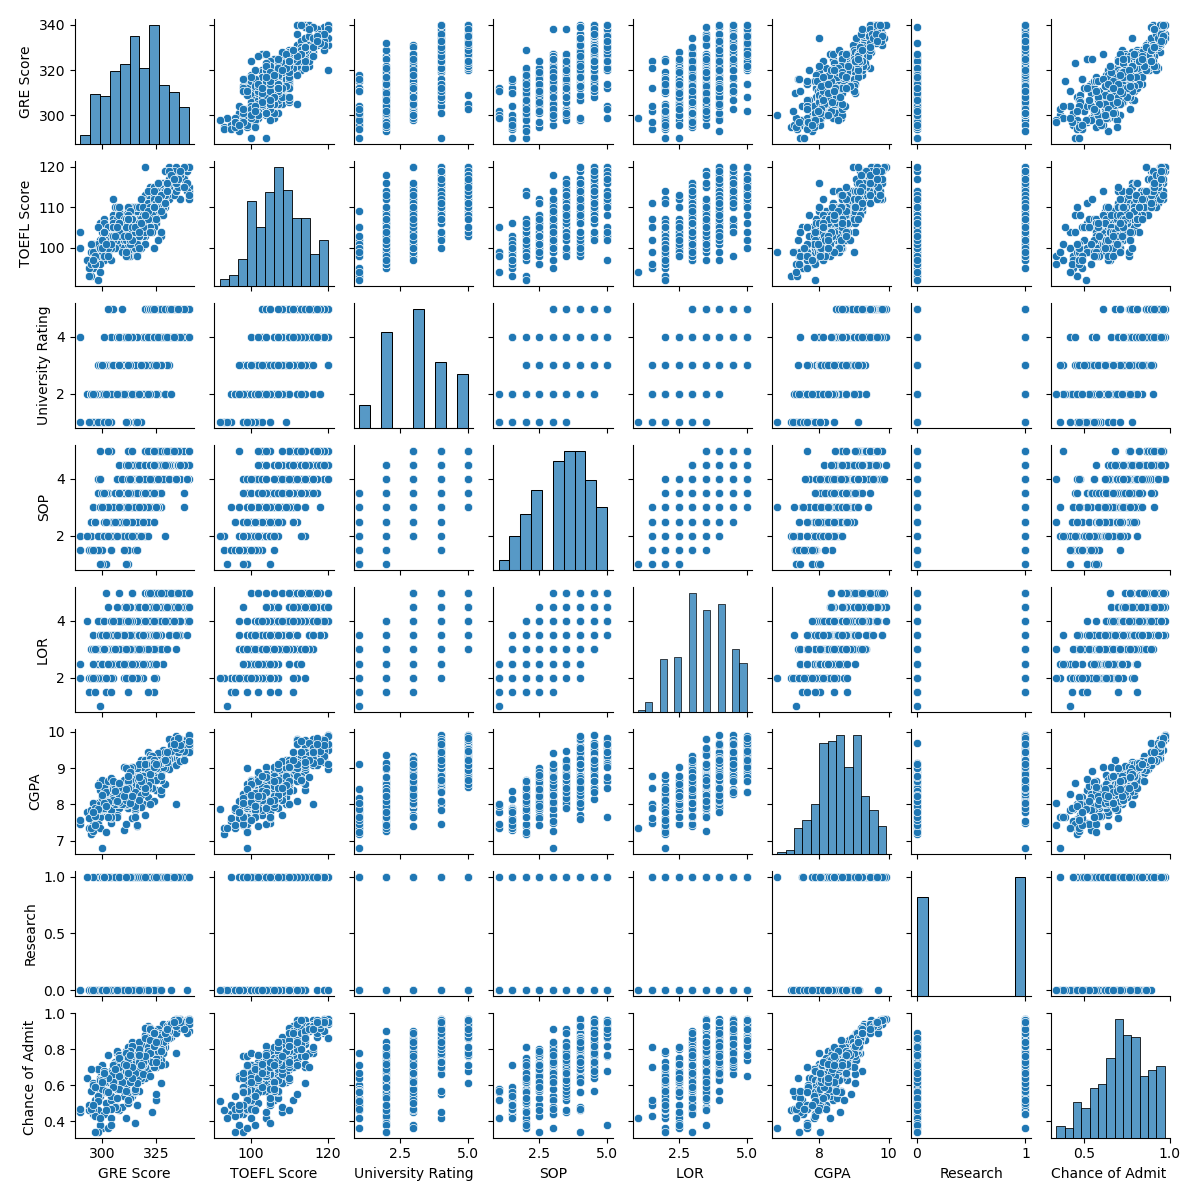

In [42]:
#Análise exploratória por meio de gráficos
sns.pairplot(df, height = 1.5)

In [38]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Modelos de predição

Para responder a pergunta proposta, foram utilizados e comparados dois modelos de predição diferentes. São eles: Regression Tree e Random Forest. 

Uma Regression Tree é uma técnica de modelagem preditiva que usa informações fornecidas pelas features para fazer uma inferência sobre o valor da variável target.

Já uma Random Forrest é, em termos leigos, uma classificação algorítmica de várias árvores de decisão. Ela essencialmente tenta montar múltiplas árvores de decisão de maneira aleatória que, cuja previsão coletiva tem uma precisão maior do que a de qualquer árvore individual. Dessa maneira, é possível encontrar correlações préviamente desconhecidas.

Para a execução de cada um deles, foi utilizada a biblioteca sklearn e as funções DecisionTreeRegressor e RandomForestRegressor, que aplicam os métodos mencionados e automaticamente retornam uma variável com os valores desejados.

Porém antes da aplicação dos métodos, o dataset foi separado em duas partes, sendo 70 % dele usado para o treinamento do algoritmo, e os outros 30 % para testar sua eficácia.


In [10]:
#Montagem da Regression Tree e Random Forest
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y = df['Chance of Admit ']

In [11]:
#Separação para 70% de treinamento and 30% de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [65]:
#Montagem da Decision Tree
dtr = DecisionTreeRegressor(max_depth = 3)

dtr = dtr.fit(X_train, Y_train)

Y_pred = dtr.predict(X_test)

In [66]:
#Avaliação do R2 da Decision Tree
metrics.r2_score(Y_test, Y_pred)

0.7315331943881513

<IPython.core.display.Javascript object>


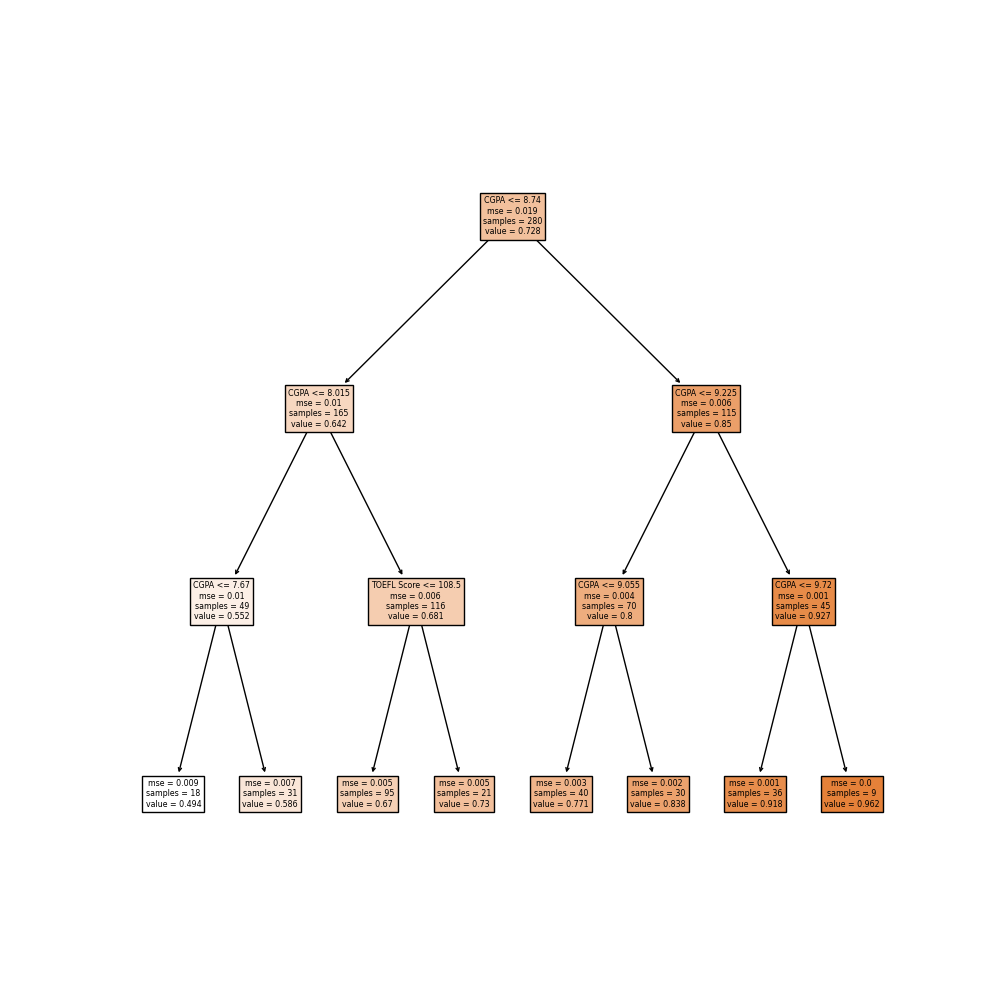

In [67]:
#Árvore de Decisão
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dtr, feature_names=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], filled=True)

<IPython.core.display.Javascript object>


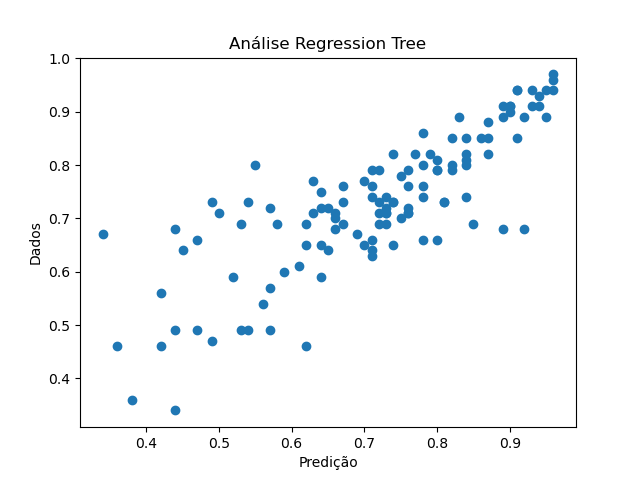

In [43]:
#Gráfico da Decision Tree
plt.figure()

plt.scatter(Y_test, Y_pred)
plt.xlabel('Predição')
plt.ylabel('Dados')
plt.title('Análise Regression Tree')

plt.show()

In [109]:
#Montagem da Random Forest

rfr = RandomForestRegressor()

rfr = rfr.fit(X_train, Y_train)

y_pred = rfr.predict(X_test)

In [110]:
#Avaliação da porcentagem de acerto da Random Forest
metrics.r2_score(Y_test, y_pred)

0.7923617656608356

<IPython.core.display.Javascript object>


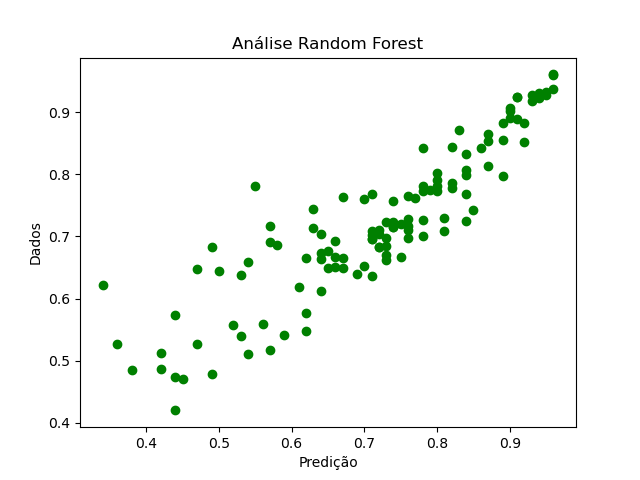

In [111]:
#Gráfico da Random Forest
plt.figure()

plt.scatter(Y_test, y_pred, color = 'g')
plt.xlabel('Predição')
plt.ylabel('Dados')
plt.title('Análise Random Forest')

plt.show()

In [112]:
Resultados = rfr.predict(X)

In [114]:
metrics.r2_score(Y, Resultados)

0.9045959156984464

## Conclusão

Em conclusão, com base nos resultados gráficos, ambos os métodos tem uma taxa de acerto maior quando a taxa de admissão é acima de 0,65. Ainda assim não foi possível dizer com certeza qual dos métodos é o mais eficas para responder a pergunta.

Para resolver esse problema, foi analisado o valor de Coeficiente de Determinação (R²) de cada modelo de predição.

O R² diz com quanta precisão o modelo pode explicar os valores observados. Assim, modelos com um maior valor de R² são aqueles que se ajustam melhor à amostra.

Por meio da Regression Tree, foi obtida uma porcentagem de correlação  73,15 % entre a chance de admissão e o desempenho geral nas variáveis features.

Já por meio da Random Forest, a porcentagem de correlação obtida foi de 78,73 % entre a chance de admissão e o desempenho geral nas variáveis features.

Entre ambas as técnicas, a Random Forest apresenta o maior grau de fidelidade. Portanto, ela foi utilizada para responder a pergunta original, prevendo a taxa de admissão dos alunos no dataset. Com o dataset total foi atingida uma porcentagem de correlação de 90,4 %.

O dataframe contendo todos os valores, tanto os reais quanto os da predição, pode ser encontrado abaixo.


In [113]:
df_chance = data[['Chance of Admit ']]
df_chance['Resultados'] = Resultados
df_chance

<ipython-input-113-f1c8f089f105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chance['Resultados'] = Resultados


,Chance of Admit,Resultados
0,0.92,0.9280
1,0.76,0.7689
2,0.72,0.6913
3,0.80,0.7826
4,0.65,0.6499
...,...,...
395,0.82,0.7859
396,0.84,0.8168
397,0.91,0.9242
398,0.67,0.7642
